In [87]:
from keras import models, layers
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt


# Dataset Loading

In [88]:
dataset = loadmat('C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/mnist/mnist')
print('[INFO] full MNIST dataset...')
dataset

[INFO] full MNIST dataset...


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

### Data Processing

In [89]:
#Selecting normalized data
data = dataset['data'].astype('float') / 255.0
targets = dataset['label']

print("[INFO] normalized data")
print(data)
print()
print("[INFO] data targets or labels")
print(targets)

print()
print("[INFO] data shape")
print(data.shape)

print()
print("[INFO] targets shape")
print(targets.shape)


[INFO] normalized data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[INFO] data targets or labels
[[0. 0. 0. ... 9. 9. 9.]]

[INFO] data shape
(784, 70000)

[INFO] targets shape
(1, 70000)


In [90]:
# Data splitting into training samples and test samples
# Before data split refer to the problem definition where we have a total of 70000 data points represented by a 784-d vector
# Given the state of our model now we have a dataset with a (784, 70000) and (1, 70000) for data and targets respectively
# therefore we need to transpose our data to comply with problems' data definition.
data = data.T
targets = targets.T

print("[INFO] current shape of data after transpose...{} + current shape of targets after transpose...{}".format(data.shape, targets.shape))


[INFO] current shape of data after transpose...(70000, 784) + current shape of targets after transpose...(70000, 1)


In [91]:
# Train, Validation and Test Split
(trainX, testX, trainY, testY) = train_test_split(data, targets, test_size=0.25)
(train_samples, validation_samples, train_labels, validation_labels) = train_test_split(trainX, trainY, test_size=0.25)
print("[INFO] Train samples....")
print(train_samples)
print()

print("[INFO] Train labels....")
print(train_labels)
print()

print("[INFO] Validation samples....")
print(validation_samples)
print()


print("[INFO] Validation labels....")
print(validation_labels)
print()


print("[INFO] Test samples....")
print(testX)
print()

print("[INFO] Test labels....")
print(testY)
print()


print("[INFO] Train samples shape....")
print(train_samples.shape)
print()



print("[INFO] Validation samples shape....")
print(validation_samples.shape)
print()



print("[INFO] Test samples shape....")
print(testX.shape)
print()


print("[INFO] test_label[0] : {}".format(testY[0]))
print("[INFO] train_label[0] : {}".format(train_labels[0]))
print("[INFO] validation_label[0] : {}".format(validation_labels[0]))

[INFO] Train samples....
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[INFO] Train labels....
[[1.]
 [4.]
 [1.]
 ...
 [3.]
 [2.]
 [4.]]

[INFO] Validation samples....
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[INFO] Validation labels....
[[1.]
 [7.]
 [3.]
 ...
 [1.]
 [1.]
 [9.]]

[INFO] Test samples....
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[INFO] Test labels....
[[0.]
 [9.]
 [1.]
 ...
 [0.]
 [6.]
 [3.]]

[INFO] Train samples shape....
(39375, 784)

[INFO] Validation samples shape....
(13125, 784)

[INFO] Test samples shape....
(17500, 784)

[INFO] test_label[0] : [0.]
[INFO] train_label[0] : [1.]
[INFO] validation_label[0] : [1.]


In [92]:
# Label Binarization
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
validation_labels = lb.fit_transform(validation_labels)
testY = lb.fit_transform(testY)
print("[INFO] test_label[0] : {}".format(testY[0]))
print("[INFO] train_label[0] : {}".format(train_labels[0]))
print("[INFO] validation_label[0] : {}".format(validation_labels[0]))

[INFO] test_label[0] : [1 0 0 0 0 0 0 0 0 0]
[INFO] train_label[0] : [0 1 0 0 0 0 0 0 0 0]
[INFO] validation_label[0] : [0 1 0 0 0 0 0 0 0 0]


# Model definintion

In [93]:
model = models.Sequential()
model.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
print("[INFO] model summary...")
model.summary()

[INFO] model summary...
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Model Compilation and Training

In [94]:
# Model compilation
# A stocastic gradient decent is used with a learning rate of 0.01
sgd = SGD(0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])

# Model training
history = model.fit(train_samples, train_labels, epochs=100, batch_size=128, validation_data=(validation_samples, validation_labels))

Train on 39375 samples, validate on 13125 samples
Epoch 1/100
39375/39375 [==============================] - 2s 39us/step - loss: 2.2903 - acc: 0.1617 - val_loss: 2.2636 - val_acc: 0.3092
Epoch 2/100
39375/39375 [==============================] - 2s 39us/step - loss: 2.2441 - acc: 0.2917 - val_loss: 2.2218 - val_acc: 0.4418
Epoch 3/100
39375/39375 [==============================] - 1s 36us/step - loss: 2.1990 - acc: 0.4371 - val_loss: 2.1723 - val_acc: 0.5131
Epoch 4/100
39375/39375 [==============================] - 1s 36us/step - loss: 2.1442 - acc: 0.5270 - val_loss: 2.1123 - val_acc: 0.4563
Epoch 5/100
39375/39375 [==============================] - 1s 37us/step - loss: 2.0750 - acc: 0.5640 - val_loss: 2.0316 - val_acc: 0.6002
Epoch 6/100
39375/39375 [==============================] - 2s 39us/step - loss: 1.9860 - acc: 0.6104 - val_loss: 1.9311 - val_acc: 0.5888
Epoch 7/100
39375/39375 [==============================] - 1s 36us/step - loss: 1.8745 - acc: 0.6295 - val_loss: 1.8078 - 

39375/39375 [==============================] - 2s 39us/step - loss: 0.3521 - acc: 0.9006 - val_loss: 0.3722 - val_acc: 0.8942
Epoch 60/100
39375/39375 [==============================] - 2s 41us/step - loss: 0.3499 - acc: 0.9012 - val_loss: 0.3701 - val_acc: 0.8942
Epoch 61/100
39375/39375 [==============================] - 1s 37us/step - loss: 0.3477 - acc: 0.9014 - val_loss: 0.3683 - val_acc: 0.8950
Epoch 62/100
39375/39375 [==============================] - 1s 37us/step - loss: 0.3456 - acc: 0.9020 - val_loss: 0.3665 - val_acc: 0.8946
Epoch 63/100
39375/39375 [==============================] - 2s 40us/step - loss: 0.3436 - acc: 0.9027 - val_loss: 0.3648 - val_acc: 0.8958
Epoch 64/100
39375/39375 [==============================] - 2s 39us/step - loss: 0.3416 - acc: 0.9032 - val_loss: 0.3631 - val_acc: 0.8954
Epoch 65/100
39375/39375 [==============================] - 2s 38us/step - loss: 0.3398 - acc: 0.9031 - val_loss: 0.3612 - val_acc: 0.8966
Epoch 66/100
39375/39375 [==============

# Plotting Results

In [95]:
# Data acquisition
history_dict = history.history
history_dict.keys()

accuracy = history_dict['acc']
loss = history_dict['loss']

validation_accuracy = history_dict['val_acc']
validation_loss = history_dict['val_loss']

epochs = np.arange(0, 100)

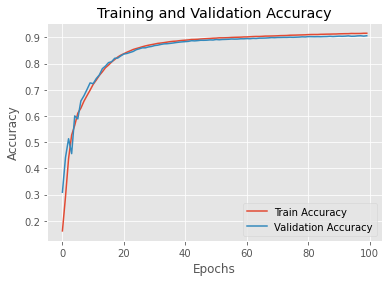

In [96]:
# Train Vs Validation accuracy
plt.style.use('ggplot')
plt.plot(epochs, accuracy, label="Train Accuracy")
plt.plot(epochs, validation_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

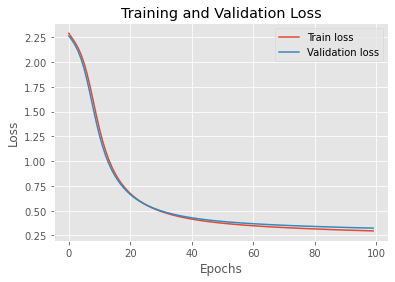

In [97]:
# Train Vs Validation loss
plt.clf()
plt.plot(epochs, loss, label="Train loss")
plt.plot(epochs, validation_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Model Evaluation

In [98]:
results = model.evaluate(testX, testY)
results

17500/17500 [==============================] - 1s 69us/step


[0.31125843826702665, 0.9089714288711548]

The goal was to train a neural network using keras to obtain > 90% accuracy on MNIST dataset.

As can be observed from the result above we have manage to evaluate a model with an accuracy of 91%

In [100]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1733
         1.0       0.94      0.97      0.95      1969
         2.0       0.90      0.87      0.89      1727
         3.0       0.90      0.88      0.89      1824
         4.0       0.90      0.92      0.91      1613
         5.0       0.88      0.84      0.86      1592
         6.0       0.93      0.95      0.94      1767
         7.0       0.93      0.93      0.93      1803
         8.0       0.89      0.88      0.88      1715
         9.0       0.88      0.89      0.88      1757

    accuracy                           0.91     17500
   macro avg       0.91      0.91      0.91     17500
weighted avg       0.91      0.91      0.91     17500

